# Vegetable Classification Using Neural Network

## Dataset

The dataset choosen is vegetable dataset containing 21,000 images:
- training set contains 15,000 examples
- test set contains 3,000 examples
- validation set contains 3,000 examples

The vegetables aims to be classified into 15 different types:
- Bean
- Bitter Gourd
- Bottle Gourd
- Brinjal
- Cabbage
- Capsicum
- Carrot
- Cauliflower
- Cucumber
- Papaya
- Potato
- Pumpkin
- Radish
- Tomato

Citation request: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study


## Data Preprocessing

In [252]:
# import library
import os
import pandas as pd
import numpy as np

In [125]:
fileDirVege = 'Vegetable Images'
vege_dataset = os.listdir(fileDirVege) # Train/Test/Validation
vege_train = []
vege_test = []
vege_validation = []

for typedir in vege_dataset:
    if(not r'.' in typedir):
        typeDirName = os.path.join(fileDirVege,typedir) # Vegetable Images/train(test/validation)
        vegedir=os.listdir(typeDirName)
        for v in vegedir:
            if v != '.DS_Store':
                vegeDirName = os.path.join(typeDirName,v)
                vedir = np.array(os.listdir(vegeDirName))
                for vegetable in vedir:
                    if(vegetable[-3:]=='jpg'):
                        fn=os.path.join(vegeDirName,vegetable)
                        if typedir == 'train':
                            vege_train.append(fn)
                        elif typedir == 'test':
                            vege_test.append(fn)
                        else:
                            vege_validation.append(fn)

In [303]:
# image manipulation
from PIL import Image

# label the data
def label(path):
    img, labels = [], []
    
    l1 = os.listdir(path)
    for i in l1:
        if i != '.DS_Store':
            l2 = os.listdir(path+'/'+i)
            for j in l2:
                image = Image.open(path+'/'+i+'/'+j)
                image.convert('L')
                image = image.resize(size = (28,28))
                img.append(np.array(image).flatten())
                labels.append(i)
    return np.array(img), labels

In [324]:
# Split Dataset
X_train, y_train = label("Vegetable Images/train")

In [325]:
X_test, y_test = label("Vegetable Images/test")

In [326]:
X_val, y_val = label("Vegetable Images/validation")

In [327]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.fit_transform(y_train)

le.fit(y_test)
y_test = le.fit_transform(y_test)

le.fit(y_val)
y_val = le.fit_transform(y_val)

## Build the model

In [328]:
# Build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model =Sequential([
    tf.keras.Input(shape=(X_train.shape[1]),),
    Dense(512, activation = 'relu', name = "L1"),
    Dense(256, activation = 'relu', name = "L2"),
    Dense(128, activation = 'relu', name = "L3"),
    Dense(64, activation = 'relu', name = "L4"), 
    Dense(15, activation = 'linear', name = "L5")   
], name = 'Shape_Recognition')
model.summary()

Model: "Shape_Recognition"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 512)               1204736   
                                                                 
 L2 (Dense)                  (None, 256)               131328    
                                                                 
 L3 (Dense)                  (None, 128)               32896     
                                                                 
 L4 (Dense)                  (None, 64)                8256      
                                                                 
 L5 (Dense)                  (None, 15)                975       
                                                                 
Total params: 1,378,191
Trainable params: 1,378,191
Non-trainable params: 0
_________________________________________________________________


In [329]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['acc'])
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_val, y_val))

Epoch 1/100
469/469 [==============================] - 8s 14ms/step - loss: 12.7716 - acc: 0.2138 - val_loss: 2.7692 - val_acc: 0.2990
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 2.0758 - acc: 0.3844 - val_loss: 1.8968 - val_acc: 0.4300
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 1.7096 - acc: 0.4711 - val_loss: 1.9298 - val_acc: 0.4423
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 1.5298 - acc: 0.5230 - val_loss: 1.5549 - val_acc: 0.5077
Epoch 5/100
469/469 [==============================] - 7s 15ms/step - loss: 1.4247 - acc: 0.5472 - val_loss: 1.3183 - val_acc: 0.5793
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 1.3128 - acc: 0.5858 - val_loss: 1.5120 - val_acc: 0.5327
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 1.2528 - acc: 0.6024 - val_loss: 1.3128 - val_acc: 0.5937
Epoch 8/100
469/469 [==============================] - 7s 14m

Epoch 62/100
469/469 [==============================] - 7s 14ms/step - loss: 0.3036 - acc: 0.9092 - val_loss: 0.8131 - val_acc: 0.8097
Epoch 63/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2692 - acc: 0.9195 - val_loss: 0.7234 - val_acc: 0.8330
Epoch 64/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2375 - acc: 0.9287 - val_loss: 0.6680 - val_acc: 0.8480
Epoch 65/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2757 - acc: 0.9165 - val_loss: 0.7657 - val_acc: 0.8293
Epoch 66/100
469/469 [==============================] - 6s 14ms/step - loss: 0.2597 - acc: 0.9244 - val_loss: 0.6157 - val_acc: 0.8620
Epoch 67/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2816 - acc: 0.9171 - val_loss: 0.9975 - val_acc: 0.7653
Epoch 68/100
469/469 [==============================] - 7s 14ms/step - loss: 0.2506 - acc: 0.9249 - val_loss: 0.7994 - val_acc: 0.8220
Epoch 69/100
469/469 [==============================] -

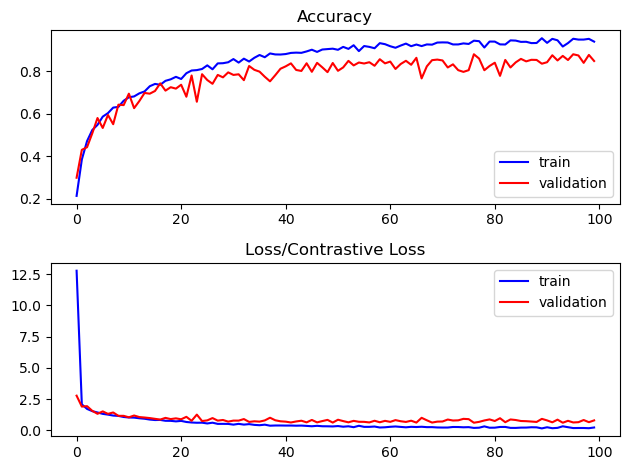

In [330]:
import matplotlib.pyplot as plt

plt.subplot(2,1,1)
plt.title("Accuracy")
plt.plot(history.history["acc"], color="blue", label="train")
plt.plot(history.history["val_acc"], color="red", label="validation")
plt.legend(loc="best")

plt.subplot(2,1,2)
plt.title("Loss/Contrastive Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="red", label="validation")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

## Model testing

In [342]:
# Test the model
y_pred = []
for i in range(X_test.shape[0]):
    v = X_test[i]
    prediction = model.predict(v.reshape(1,2352))
    p = tf.nn.softmax(prediction)
    y_hat = np.argmax(p)
    y_pred.append(y_hat)
y_pred = np.array(y_pred)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


## Model evaluation

In [343]:
# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
acc = accuracy_score(y_pred,y_test)
cm = confusion_matrix(y_test,y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

Accuracy: 0.8583333333333333
              precision    recall  f1-score   support

           0       0.71      0.88      0.78       200
           1       0.80      0.90      0.84       200
           2       0.94      0.96      0.95       200
           3       0.83      0.85      0.84       200
           4       0.79      0.94      0.86       200
           5       0.91      0.64      0.75       200
           6       0.96      0.94      0.95       200
           7       0.96      0.97      0.97       200
           8       0.80      0.71      0.75       200
           9       0.91      0.81      0.85       200
          10       0.93      0.94      0.93       200
          11       0.93      0.94      0.93       200
          12       0.74      0.80      0.77       200
          13       0.91      0.92      0.91       200
          14       0.84      0.70      0.77       200

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      30

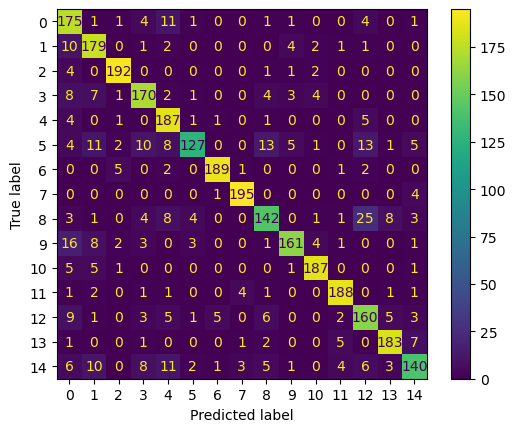

In [345]:
# Demo the evaluation
print('Accuracy:',acc)
print(classification_report(y_test,y_pred))
cm_display.plot()
plt.show()